## Q. 다음 분기에 어떤 게임을 설계해야 할까?

### Data Description
- Name : 게임의 이름
- Platform : 게임이 지원되는 플랫폼의 이름
- Year : 게임이 출시된 연도
- Genre : 게임의 장르
- Publisher : 게임을 제작한 회사
- NA_Sales : 북미지역에서의 출고량
- EU_Sales : 유럽지역에서의 출고량
- JP_Sales : 일본지역에서의 출고량
- Other_Sales : 기타지역에서의 출고량

출고량 단위는 백만단위(in millions of units)

In [1]:
import pandas as pd
import numpy as np

In [2]:
url = "https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv"

In [3]:
df = pd.read_csv(url)

# 1. EDA
- 데이터 확인
- 결측치 확인
- 중복데이터 확인

In [4]:
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [5]:
df.shape

(16598, 10)

In [6]:
# 'Unnamed: 0 컬럼' 삭제
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [7]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [9]:
# 결측치 확인
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

- 다음 분기에 어떤 게임을 설계할지 파악하는 과정에서 연도와 장르 데이터는 중요하다고 생각한다. 이 두 컬럼에 임의로 데이터를 채웠을 경우 추후 분석하는 과정에서 오류가 발생할 수 있으므로 Year와 Genre의 결측값 처리는 제거하는 것으로 결정한다.

In [10]:
df_clean = df.copy()

In [11]:
# 'Year', 'Genre' 결측치가 있는 행 제거 & 인덱스 정리
df_clean = df_clean.dropna(subset=['Year'])
df_clean = df_clean.dropna(subset=['Genre'])
df_clean.reset_index(drop=True, inplace=True)

In [12]:
df_clean.isnull().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher      36
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
dtype: int64

In [13]:
df_clean['Publisher'].unique()

array(['Destineer', 'Namco Bandai Games', 'Alchemist', 'Zoo Games',
       'D3Publisher', 'Konami Digital Entertainment', 'Deep Silver',
       'Tecmo Koei', 'Sega', 'THQ', 'Empire Interactive', 'Ubisoft',
       'Paradox Interactive', '505 Games', 'Tomy Corporation',
       'Eidos Interactive', 'Microsoft Game Studios',
       'Nippon Ichi Software', 'Kalypso Media', 'Electronic Arts',
       'Sony Computer Entertainment', 'Activision',
       'Tru Blu Entertainment', 'Warner Bros. Interactive Entertainment',
       'Midway Games', 'Mindscape', 'Wargaming.net', 'Capcom',
       'Acclaim Entertainment', 'Unknown', 'Nintendo',
       'Disney Interactive Studios', 'Crave Entertainment', 'Sunflowers',
       'Arc System Works', 'Milestone S.r.l', 'Kamui', 'Hudson Soft',
       'Square Enix', 'Focus Home Interactive', 'Take-Two Interactive',
       'Game Factory', 'Takara Tomy', 'SquareSoft', 'Global Star',
       'Infogrames', 'GT Interactive', 'Storm City Games',
       'Gathering of Dev

In [14]:
df_clean.sample(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2973,Airlock,2600,1981.0,Action,Data Age,0.36,0.02,0,0
13884,Thunderbirds,GBA,2004.0,Shooter,Vivendi Games,0.02,0.01,0,0
8205,Cartoon Network Collection: Game Boy Advance V...,GBA,2004.0,Misc,NaN,0.06,0.02,0,0
8528,F1 2013,PS3,2013.0,Racing,Codemasters,0.01,0.45,0.03,0.15
12053,Let's TAP,Wii,2008.0,Misc,Sega,0.09,0.06,0.01,0.02
16246,Um Jammer Lammy,PS,1998.0,Misc,Sony Computer Entertainment,0.12,0.08,0.41,0.04
1768,Shin Hayarigami,PS3,2014.0,Adventure,Nippon Ichi Software,0,0,0.04,0
10013,Monotaro Dentetsu 2010: Sengoku Ishin no Hero ...,Wii,2009.0,Misc,Hudson Soft,0,0,0.41,0
12283,Smart Kid's Mega Game Mix,DS,2009.0,Misc,UFO Interactive,0.01,0,0,0
3267,Capcom Fighting Evolution,XB,2005.0,Fighting,Capcom,0.03,0.01,0,0


In [15]:
# 'Publisher' 컬럼 결측치를 'Unknown'으로 대체
df_clean.fillna('Unknown', inplace=True)

In [16]:
df_clean.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [17]:
# 중복 데이터 확인
df_clean.duplicated().sum()

0

In [18]:
df_clean.shape

(16277, 9)

In [19]:
df_clean['Platform'].unique()

array(['DS', 'Wii', 'PSP', 'PS3', 'PC', 'PS', 'GBA', 'PS4', 'PS2', 'XB',
       'X360', 'GC', '3DS', '2600', 'SAT', 'GB', 'NES', 'DC', 'N64',
       'XOne', 'SNES', 'WiiU', 'PSV', 'GEN', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [20]:
# Year 컬럼 데이터 타입 int로 변경
df_clean['Year'] = df_clean['Year'].astype(int)

In [21]:
df_clean.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04


In [22]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16277 entries, 0 to 16276
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         16277 non-null  object
 1   Platform     16277 non-null  object
 2   Year         16277 non-null  int64 
 3   Genre        16277 non-null  object
 4   Publisher    16277 non-null  object
 5   NA_Sales     16277 non-null  object
 6   EU_Sales     16277 non-null  object
 7   JP_Sales     16277 non-null  object
 8   Other_Sales  16277 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.1+ MB


- 데이터를 확인하였더니 출고량에 'K', 'M'과 같은 단위가 섞여있어 바로 float로 변환이 불가능하다. 단위 통일 및 문자를 제거해주는 작업 필요.

In [24]:
# 단위 M 제거
df_clean['NA_Sales'].str.replace('M','')
df_clean.NA_Sales = df_clean.NA_Sales.str.replace('M','')
df_clean.EU_Sales = df_clean.EU_Sales.str.replace('M','')
df_clean.JP_Sales = df_clean.JP_Sales.str.replace('M','')
df_clean.Other_Sales = df_clean.Other_Sales.str.replace('M','')

In [25]:
# 단위 K 제거
ns_change = df_clean.loc[df_clean.NA_Sales.str.contains('K')].NA_Sales.str.replace('K','').astype(float) * 0.001
es_change = df_clean.loc[df_clean.EU_Sales.str.contains('K')].EU_Sales.str.replace('K','').astype(float) * 0.001
js_change = df_clean.loc[df_clean.JP_Sales.str.contains('K')].JP_Sales.str.replace('K','').astype(float) * 0.001
os_change = df_clean.loc[df_clean.Other_Sales.str.contains('K')].Other_Sales.str.replace('K','').astype(float) * 0.001

In [26]:
df_clean['NA_Sales'].loc[df_clean.NA_Sales.str.contains('K')] = ns_change
df_clean['EU_Sales'].loc[df_clean.EU_Sales.str.contains('K')] = es_change
df_clean['JP_Sales'].loc[df_clean.JP_Sales.str.contains('K')] = js_change
df_clean['Other_Sales'].loc[df_clean.Other_Sales.str.contains('K')] = os_change

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [27]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16277 entries, 0 to 16276
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         16277 non-null  object
 1   Platform     16277 non-null  object
 2   Year         16277 non-null  int64 
 3   Genre        16277 non-null  object
 4   Publisher    16277 non-null  object
 5   NA_Sales     16277 non-null  object
 6   EU_Sales     16277 non-null  object
 7   JP_Sales     16277 non-null  object
 8   Other_Sales  16277 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.1+ MB


In [28]:
# float로 타입 변경
df_clean = df_clean.astype({'NA_Sales':'float', 'EU_Sales':'float', 'JP_Sales':'float', 'Other_Sales':'float'})

In [29]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16277 entries, 0 to 16276
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16277 non-null  object 
 1   Platform     16277 non-null  object 
 2   Year         16277 non-null  int64  
 3   Genre        16277 non-null  object 
 4   Publisher    16277 non-null  object 
 5   NA_Sales     16277 non-null  float64
 6   EU_Sales     16277 non-null  float64
 7   JP_Sales     16277 non-null  float64
 8   Other_Sales  16277 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.1+ MB


In [30]:
df_clean.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04


In [31]:
# K를 포함하고 있던 행이 잘 제거 되어있는지 확인.
df_clean.iloc[10]

Name                  Ford Racing
Platform                       PS
Year                         2001
Genre                      Racing
Publisher      Empire Interactive
NA_Sales                     0.48
EU_Sales                     0.33
JP_Sales                      0.0
Other_Sales                  0.06
Name: 10, dtype: object

In [32]:
df_clean.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16277.000000,16277.000000,16277.000000,16277.000000,16277.000000
mean,1994.206365,0.264964,0.147202,0.078111,0.048134
std,155.313461,0.821587,0.507802,0.308951,0.189480
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000
max,2020.000000,41.490000,29.020000,10.220000,10.570000


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

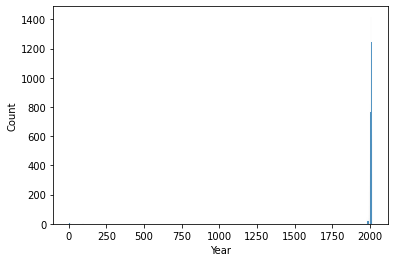

In [34]:
sns.histplot(x='Year', data=df_clean)

In [35]:
df_clean[df_clean.Year < 1000]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
72,Age of Empires III: Complete Collection,PC,9,Strategy,Microsoft Game Studios,0.01,0.12,0.00,0.03
79,Treasures of the Deep,PS,97,Action,Namco Bandai Games,0.10,0.07,0.00,0.01
210,NASCAR Unleashed,PS3,11,Racing,Activision,0.09,0.00,0.00,0.01
300,Kung Fu Panda: Showdown of Legendary Legends,PS3,15,Action,Little Orbit,0.00,0.02,0.00,0.00
759,NASCAR Thunder 2004,PS2,3,Racing,Electronic Arts,0.53,0.41,0.00,0.14
...,...,...,...,...,...,...,...,...,...
15676,Sugoi Hebereke,SNES,94,Fighting,Sunsoft,0.00,0.00,0.02,0.00
15792,Fab 5 Soccer,DS,8,Sports,Destineer,0.01,0.00,0.00,0.00
15837,Dragon Ball Z: Burst Limit,X360,8,Fighting,Atari,0.24,0.18,0.03,0.05
16078,Point Blank 3,PS,0,Shooter,Namco Bandai Games,0.01,0.01,0.00,0.00


In [36]:
df_clean[df_clean.Year < 1000].Year.max()

98

In [37]:
df_clean[df_clean.Year < 90].Year.max()

86

In [38]:
df_clean[df_clean.Year < 80].Year.max()

16

In [39]:
df_clean.loc[df_clean.Year == 1, 'Year']

2211    1
8523    1
Name: Year, dtype: int64

In [40]:
df_clean_year = df_clean.copy()

In [41]:
for i in range(17):
    df_clean_year.loc[df_clean_year.Year == i, 'Year'] = 2000 + i

df_clean_year.loc[(80 < df_clean_year.Year) & (df_clean_year.Year < 100), 'Year'] += 1900

In [42]:
df_clean_year[df_clean_year.Year < 100]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


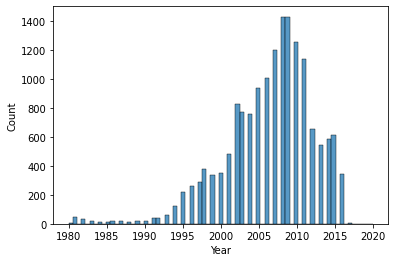

In [43]:
sns.histplot(x='Year', data=df_clean_year)

In [44]:
df_clean_year

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16272,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16273,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16274,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16275,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [45]:
df_clean_year.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16277.000000,16277.000000,16277.000000,16277.000000,16277.000000
mean,2006.407630,0.264964,0.147202,0.078111,0.048134
std,5.828646,0.821587,0.507802,0.308951,0.189480
min,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000
max,2020.000000,41.490000,29.020000,10.220000,10.570000


In [46]:
# 모든 출고량이 0인 행 
# -> 제거하고자 하였으나 모든 나라에 출고량이 0인 데이터도 의미가 있을 것이라 판단하여 제거하지 않기로 함.
df_clean[(df_clean_year['NA_Sales']==0) & (df_clean_year['EU_Sales']==0) & (df_clean_year['JP_Sales']==0) & (df_clean_year['Other_Sales']==0)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
5494,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.0,0.0,0.0,0.0


In [47]:
# 출고량의 상위 1% 값
ns = df_clean_year['NA_Sales'].quantile(0.99)
es = df_clean_year['EU_Sales'].quantile(0.99)
js = df_clean_year['JP_Sales'].quantile(0.99)
os = df_clean_year['Other_Sales'].quantile(0.99)

print("<상위 1%값>\nNA_Sales: {}\nEU_Sales: {}\nJP_Sales: {}\nOther_Sales: {}".format(ns, es, js, os))

<상위 1%값>
NA_Sales: 2.8047999999999953
EU_Sales: 1.94
JP_Sales: 1.27
Other_Sales: 0.65


In [48]:
less_ns = df_clean_year[df_clean_year.NA_Sales < ns]
larger_ns = df_clean_year[df_clean_year.NA_Sales >= ns]

In [49]:
len(less_ns), len(larger_ns)

(16114, 163)

In [50]:
len(larger_ns) / len(less_ns)

0.010115427578503165

- NA_Sales 의 값을 상위 1% 인 것들을 이상치로 볼까 하였으나 0.01011이라는 값이 생각보다 크다고 판단하여 히스토그램을 줄여가며 파악하기로 함.

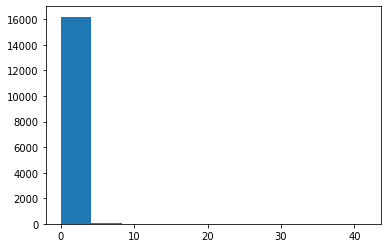

In [51]:
plt.hist(df_clean_year.NA_Sales);

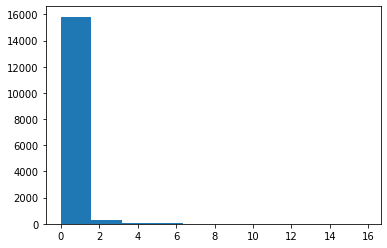

In [52]:
plt.hist(df_clean_year.NA_Sales[df_clean_year.NA_Sales < 20]);

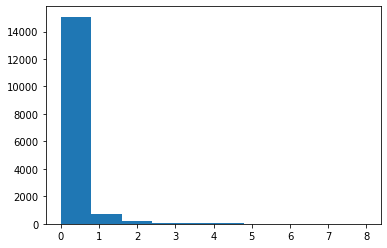

In [53]:
plt.hist(df_clean_year.NA_Sales[df_clean_year.NA_Sales < 8]);

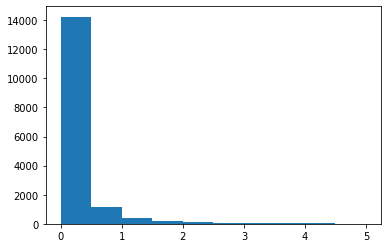

In [54]:
plt.hist(df_clean_year.NA_Sales[df_clean_year.NA_Sales < 5]);

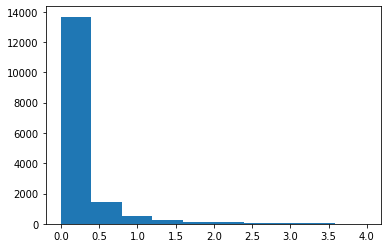

In [55]:
plt.hist(df_clean_year.NA_Sales[df_clean_year.NA_Sales < 4]);

In [56]:
less_4 = df_clean_year[df_clean_year.NA_Sales < 4]
larger_4 = df_clean_year[df_clean_year.NA_Sales >= 4]

In [57]:
len(less_4), len(larger_4)

(16190, 87)

In [58]:
len(larger_4) / len(less_4)

0.0053736874613959235

In [59]:
# Global_Sales 컬럼 생성
df_clean_year['Global_Sales'] = df_clean_year.iloc[:,5:].sum(axis=1)

In [60]:
df_clean_year.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


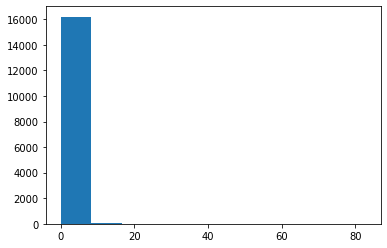

In [61]:
plt.hist(df_clean_year.Global_Sales);

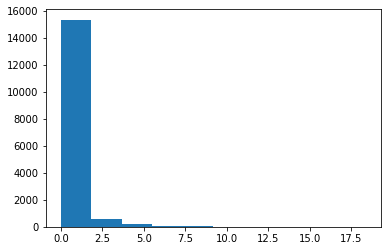

In [62]:
plt.hist(df_clean_year.Global_Sales[df_clean_year.Global_Sales < 20]);

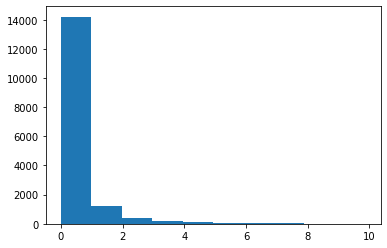

In [63]:
plt.hist(df_clean_year.Global_Sales[df_clean_year.Global_Sales < 10]);

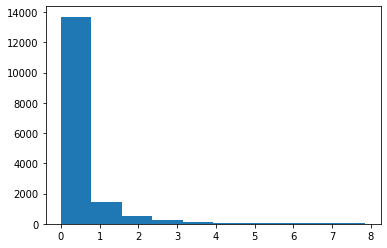

In [64]:
plt.hist(df_clean_year.Global_Sales[df_clean_year.Global_Sales < 8]);

In [65]:
# Global_Sales를 히스토그램으로 확인해가며 이상치를 제거하였을 때
less_8 = df_clean_year[df_clean_year.Global_Sales < 8]
larger_8 = df_clean_year[df_clean_year.Global_Sales >= 8]

In [66]:
len(less_8), len(larger_8)

(16192, 85)

In [67]:
len(larger_8) / len(less_8)

0.005249505928853755

In [68]:
# Global_Sales의 상위 1%를 이상치로 보고 제거하였을 때
gs = df_clean_year['Global_Sales'].quantile(0.99)

In [69]:
less_gs = df_clean_year[df_clean_year.Global_Sales < gs]
larger_gs = df_clean_year[df_clean_year.Global_Sales >= gs]

print(len(less_gs), len(larger_gs))
print(len(larger_gs) / len(less_gs))

16114 163
0.010115427578503165


- Global_Sales의 이상치를 제거하기 위해서 히스토그램과 상위 1%의 값을 사용하였다.
- 히스토그램을 보며 정한 값과 상위 1%의 값을 이상치로 보았을 때의 비율이 2배 정도 차이가 난다. 0.01이라는 값이 크다고 생각되어 히스토그램을 보며 정한 값을 기준으로 이상치를 제거하기로 결정.

In [70]:
df_clean_year = df_clean_year.drop(index = df_clean_year[df_clean_year.Global_Sales >= 8].index).reset_index(drop=True)

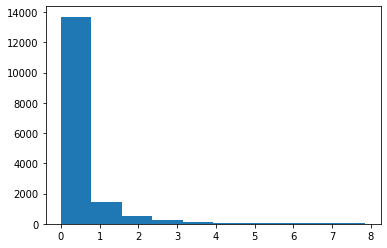

In [71]:
plt.hist(df_clean_year.Global_Sales);

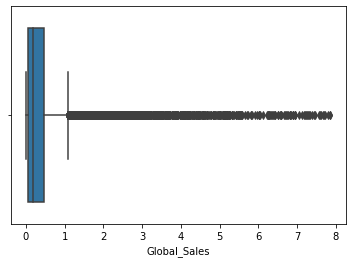

In [72]:
sns.boxplot(x=df_clean_year.Global_Sales);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


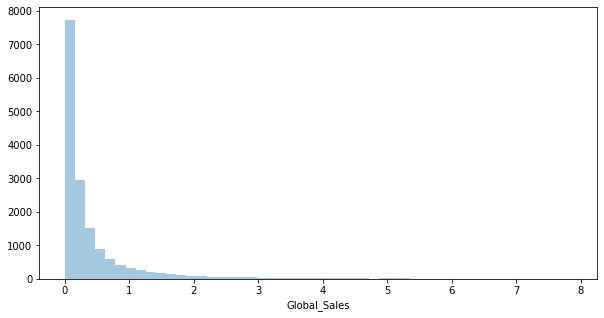

In [73]:
plt.figure(figsize=(10,5))
sns.distplot(df_clean_year.Global_Sales, kde=False);

In [74]:
df_clean_year.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16192.000000,16192.000000,16192.000000,16192.000000,16192.000000,16192.000000
mean,2006.414464,0.226360,0.124094,0.067161,0.040853,0.458468
std,5.818310,0.441932,0.294098,0.222612,0.108436,0.821409
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.230000,0.110000,0.040000,0.030000,0.470000
max,2020.000000,7.280000,6.210000,4.870000,2.930000,7.860000


In [75]:
# 2 이상의 데이터가 이상치로 볼 수 있을 만큼 적다.
len(df_clean_year[df_clean_year.Global_Sales > 2]), len(df_clean_year[df_clean_year.Global_Sales <= 2])

(745, 15447)

In [76]:
len(df_clean_year[df_clean_year.Global_Sales > 2]) / len(df_clean_year[df_clean_year.Global_Sales <= 2])

0.04822942966271768

In [77]:
# 3 이상의 데이터가 이상치로 볼 수 있을 만큼 적다.
len(df_clean_year[df_clean_year.Global_Sales > 3]), len(df_clean_year[df_clean_year.Global_Sales <= 3])

(378, 15814)

In [78]:
len(df_clean_year[df_clean_year.Global_Sales > 3]) / len(df_clean_year[df_clean_year.Global_Sales <= 3])

0.023902870873909195

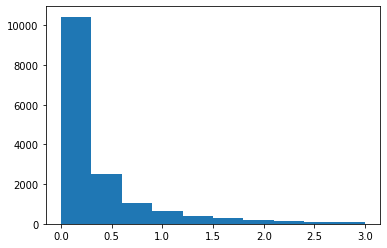

In [79]:
plt.hist(df_clean_year.Global_Sales[df_clean_year.Global_Sales <= 3]);

#### 지역에 따라서 선호하는 게임 장르가 다를까?

In [80]:
df_clean_year.groupby('Genre')['NA_Sales'].sum().sort_values()

Genre
Strategy         67.89
Puzzle           94.94
Adventure        95.76
Simulation      166.82
Fighting        213.60
Role-Playing    252.12
Racing          294.49
Platform        320.13
Misc            340.80
Shooter         433.84
Sports          588.30
Action          796.53
Name: NA_Sales, dtype: float64

In [81]:
df_clean_year.groupby('Genre')['EU_Sales'].sum().sort_values()

Genre
Puzzle           42.86
Strategy         44.92
Adventure        61.67
Simulation       89.91
Fighting         97.29
Role-Playing    136.01
Platform        151.60
Misc            173.75
Racing          190.22
Shooter         248.57
Sports          304.36
Action          468.17
Name: EU_Sales, dtype: float64

In [82]:
df_clean_year.groupby('Genre')['JP_Sales'].sum().sort_values()

Genre
Racing           31.68
Shooter          34.18
Puzzle           46.70
Strategy         49.10
Adventure        49.20
Simulation       51.92
Fighting         84.48
Platform         86.88
Misc             93.26
Sports          120.86
Action          149.37
Role-Playing    289.84
Name: JP_Sales, dtype: float64

In [83]:
df_clean_year.groupby('Genre')['Other_Sales'].sum().sort_values()

Genre
Puzzle           10.68
Strategy         11.23
Adventure        16.41
Simulation       26.57
Fighting         35.13
Platform         40.19
Role-Playing     48.17
Racing           58.23
Misc             62.12
Shooter          80.57
Sports          114.82
Action          157.37
Name: Other_Sales, dtype: float64

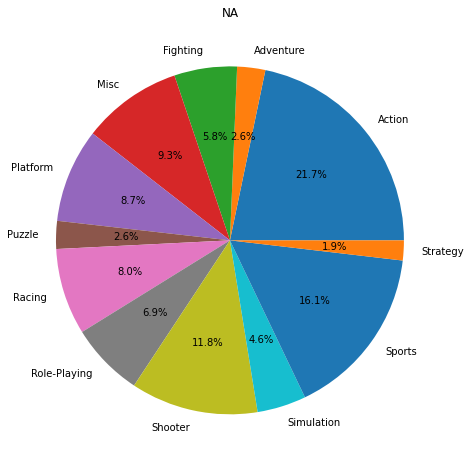

In [84]:
plt.figure(figsize=(8,8))
plt.pie(df_clean_year.groupby('Genre')['NA_Sales'].sum(), labels=df_clean_year.groupby('Genre')['NA_Sales'].sum().index, autopct='%.1f%%')
plt.title('NA')
plt.show()

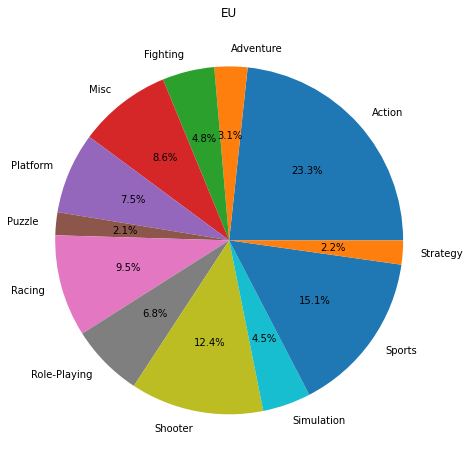

In [85]:
plt.figure(figsize=(8,8))
plt.pie(df_clean_year.groupby('Genre')['EU_Sales'].sum(), labels=df_clean_year.groupby('Genre')['EU_Sales'].sum().index, autopct='%.1f%%')
plt.title('EU')
plt.show()

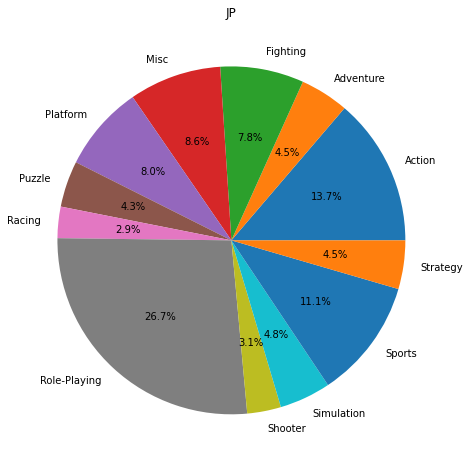

In [86]:
plt.figure(figsize=(8,8))
plt.pie(df_clean_year.groupby('Genre')['JP_Sales'].sum(), labels=df_clean_year.groupby('Genre')['JP_Sales'].sum().index, autopct='%.1f%%')
plt.title('JP')
plt.show()

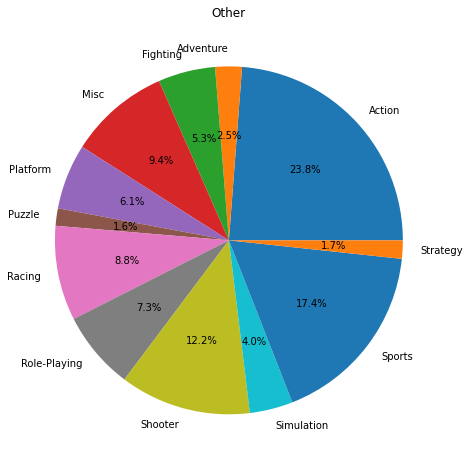

In [87]:
plt.figure(figsize=(8,8))
plt.pie(df_clean_year.groupby('Genre')['Other_Sales'].sum(), labels=df_clean_year.groupby('Genre')['Other_Sales'].sum().index, autopct='%.1f%%')
plt.title('Other')
plt.show()

In [88]:
# 장르별 각 나라의 출고량을 시각화하기 위한 데이터프레임 생성
genre_sales = df_clean_year.groupby('Genre').sum().drop(['Year', 'Global_Sales'], axis=1)
genre_sales

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,796.53,468.17,149.37,157.37
Adventure,95.76,61.67,49.20,16.41
Fighting,213.60,97.29,84.48,35.13
Misc,340.80,173.75,93.26,62.12
Platform,320.13,151.60,86.88,40.19
Puzzle,94.94,42.86,46.70,10.68
Racing,294.49,190.22,31.68,58.23
Role-Playing,252.12,136.01,289.84,48.17
Shooter,433.84,248.57,34.18,80.57


In [89]:
genre_sales.T

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
NA_Sales,796.53,95.76,213.60,340.80,320.13,94.94,294.49,252.12,433.84,166.82,588.30,67.89
EU_Sales,468.17,61.67,97.29,173.75,151.60,42.86,190.22,136.01,248.57,89.91,304.36,44.92
JP_Sales,149.37,49.20,84.48,93.26,86.88,46.70,31.68,289.84,34.18,51.92,120.86,49.10
Other_Sales,157.37,16.41,35.13,62.12,40.19,10.68,58.23,48.17,80.57,26.57,114.82,11.23


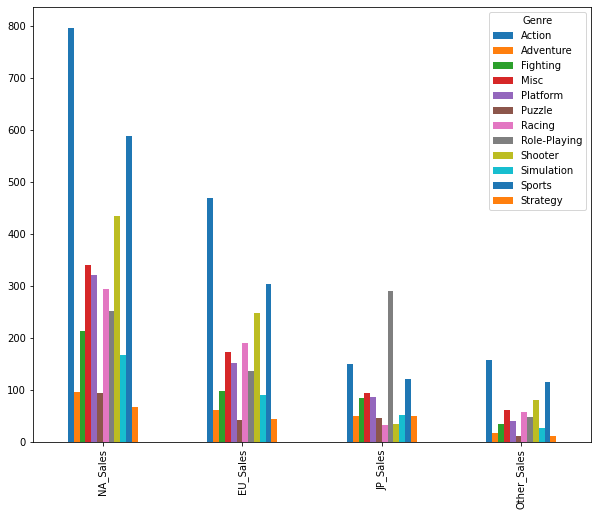

In [90]:
genre_sales.T.plot(kind='bar', figsize=(10,8))

#### 연도별 게임의 트렌드가 있을까?

In [91]:
df_clean_year.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


In [92]:
year_genre_df = df_clean_year.groupby(['Year', 'Genre']).size().reset_index().rename(columns={0:'Count'})
year_genre_df

,Year,Genre,Count
0,1980,Action,1
1,1980,Fighting,1
2,1980,Misc,4
3,1980,Shooter,2
4,1981,Action,25
...,...,...,...
383,2016,Sports,38
384,2016,Strategy,10
385,2017,Action,1
386,2017,Role-Playing,2


In [93]:
new_y_g_df = year_genre_df.set_index('Year')

In [94]:
new_y_g_df.head()

,Genre,Count
Year,,
1980,Action,1
1980,Fighting,1
1980,Misc,4
1980,Shooter,2
1981,Action,25


In [95]:
control_year_genre_df = pd.DataFrame(year_genre_df.groupby('Year')['Count'].max())
control_year_genre_df.head()

,Count
Year,
1980,4
1981,25
1982,18
1983,7
1984,3


In [96]:
control_year_genre_df.rename(columns={'Count':'Count1'}, inplace=True)

In [97]:
y_g_df = new_y_g_df.join(control_year_genre_df, how='inner')

In [98]:
y_g_df.head()

,Genre,Count,Count1
Year,,,
1980,Action,1,4
1980,Fighting,1,4
1980,Misc,4,4
1980,Shooter,2,4
1981,Action,25,25


In [99]:
finall_year_genre_df = y_g_df[y_g_df['Count'] == y_g_df['Count1']].drop(['Count1'], axis=1).reset_index()

In [100]:
finall_year_genre_df

,Year,Genre,Count
0,1980,Misc,4
1,1981,Action,25
2,1982,Action,18
3,1983,Action,7
4,1984,Puzzle,3
5,1984,Racing,3
6,1985,Puzzle,4
7,1986,Action,6
8,1986,Platform,6
9,1987,Sports,4


In [101]:
genre = finall_year_genre_df['Genre'].unique()
genre

array(['Misc', 'Action', 'Puzzle', 'Racing', 'Platform', 'Sports',
       'Role-Playing', 'Fighting', 'Shooter', 'Simulation'], dtype=object)

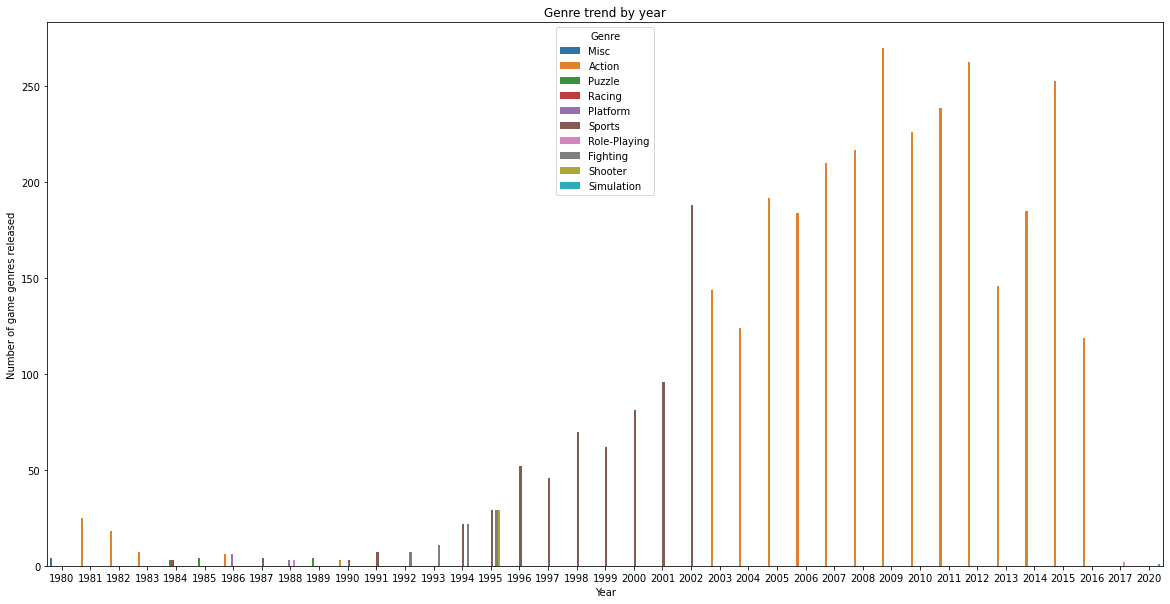

In [102]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Year', y='Count', hue='Genre', data=finall_year_genre_df)
# plt.title('연도별 장르 트렌드')
plt.title('Genre trend by year')
# plt.xlabel('연도')
# plt.ylabel('출시된 게임 장르 수')
plt.ylabel('Number of game genres released')
plt.show()

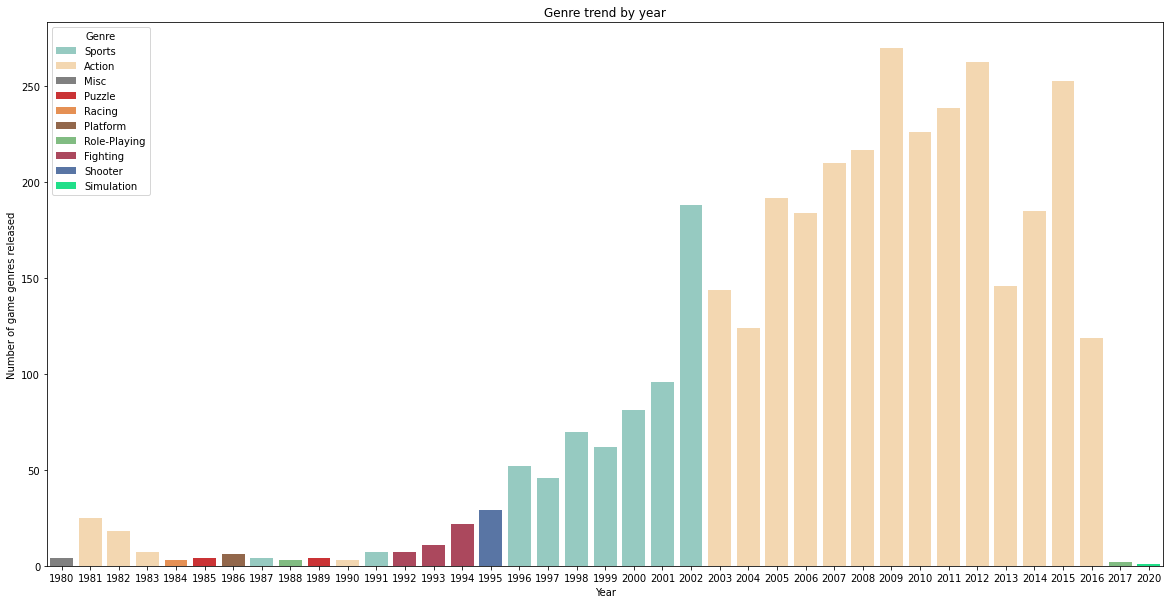

In [103]:
custom_palette = sns.color_palette("Paired", 10)
# sns.palplot(custom_palette[0])

plt.figure(figsize=(20, 10))
sns.barplot(x='Year', y='Count', hue='Genre', data=finall_year_genre_df, hue_order=['Sports'], palette='Set3')
sns.barplot(x='Year', y='Count', hue='Genre', data=finall_year_genre_df, hue_order=['Action'], palette='Pastel1_r')
sns.barplot(x='Year', y='Count', hue='Genre', data=finall_year_genre_df, hue_order=['Misc'], palette='gray')
sns.barplot(x='Year', y='Count', hue='Genre', data=finall_year_genre_df, hue_order=['Puzzle'], palette='Paired_r')
sns.barplot(x='Year', y='Count', hue='Genre', data=finall_year_genre_df, hue_order=['Racing'], palette='Oranges')
sns.barplot(x='Year', y='Count', hue='Genre', data=finall_year_genre_df, hue_order=['Platform'], palette='copper')
sns.barplot(x='Year', y='Count', hue='Genre', data=finall_year_genre_df, hue_order=['Role-Playing'], palette='YlGn')
sns.barplot(x='Year', y='Count', hue='Genre', data=finall_year_genre_df, hue_order=['Fighting'], palette='inferno')
sns.barplot(x='Year', y='Count', hue='Genre', data=finall_year_genre_df, hue_order=['Shooter'], palette='deep')
sns.barplot(x='Year', y='Count', hue='Genre', data=finall_year_genre_df, hue_order=['Simulation'], palette='gist_rainbow')

# plt.title('연도별 장르 트렌드')
plt.title('Genre trend by year')
# plt.xlabel('연도')
# plt.ylabel('출시된 게임 장르 수')
plt.ylabel('Number of game genres released')
plt.show()

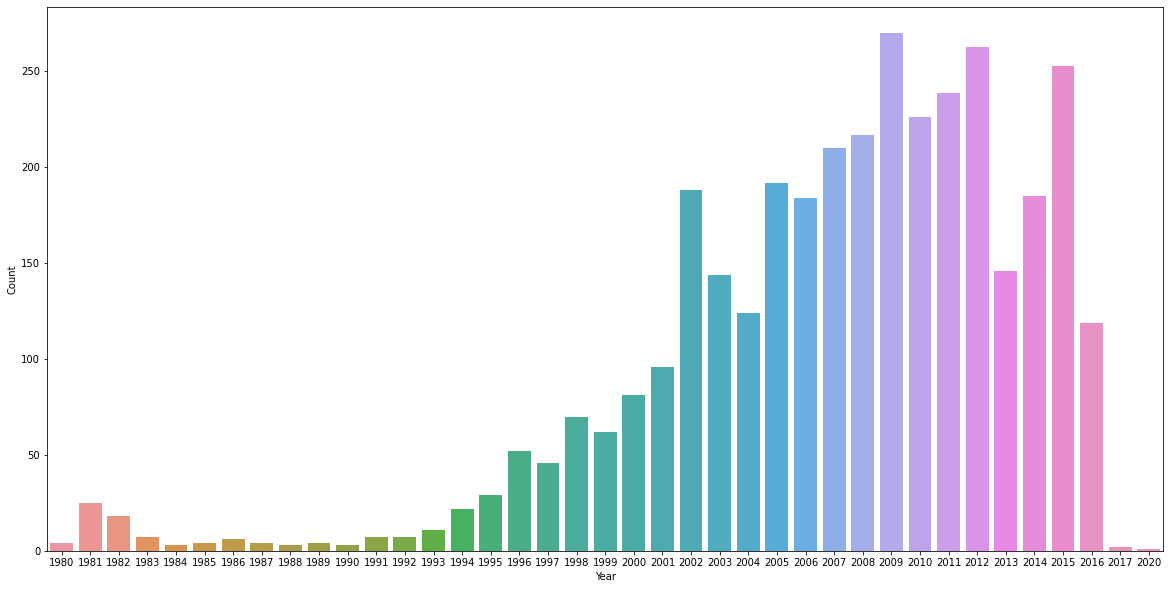

In [104]:
plt.figure(figsize=(20,10))
sns.barplot(x='Year', y='Count', data=finall_year_genre_df)

In [158]:
finall_year_genre_df.head()

,Year,Genre,Count
0,1980,Misc,4
1,1981,Action,25
2,1982,Action,18
3,1983,Action,7
4,1984,Puzzle,3


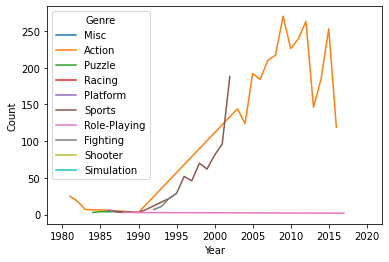

In [159]:
sns.lineplot(x='Year', y='Count', hue='Genre', data=finall_year_genre_df)

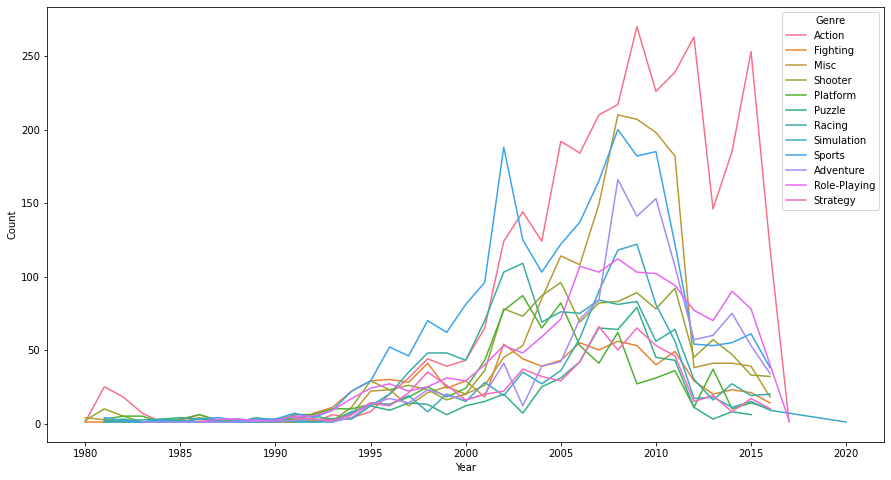

In [162]:
plt.figure(figsize=(15,8))
sns.lineplot(x='Year', y='Count', hue='Genre', data=year_genre_df)

- \+ 출고량을 가지고 연도별 게임 트렌드 확인해보기
- \+ 연도별 장르 트렌드 선 그래프로도 확인해보기

#### 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

- 글로벌 출고량을 가지고 분석을 한다.

In [105]:
# Global_Sales의 출고량이 높은 순으로 재배열
by_sales = df_clean_year.sort_values('Global_Sales', ascending = False).reset_index(drop=True)
by_sales

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Final Fantasy VIII,PS,1999,Role-Playing,SquareSoft,2.28,1.72,3.63,0.23,7.86
1,Pokémon Platinum Version,DS,2008,Role-Playing,Nintendo,2.82,1.78,2.69,0.55,7.84
2,Pac-Man,2600,1982,Puzzle,Atari,7.28,0.45,0.00,0.08,7.81
3,Grand Theft Auto: Liberty City Stories,PSP,2005,Action,Take-Two Interactive,2.90,2.83,0.24,1.75,7.72
4,Super Mario Galaxy 2,Wii,2010,Platform,Nintendo,3.66,2.42,0.98,0.64,7.70
...,...,...,...,...,...,...,...,...,...,...
16187,Rise of Flight: Iron Cross Edition,PC,2010,Simulation,Aerosoft,0.01,0.00,0.00,0.00,0.01
16188,Black Cat,PS2,2006,Action,Capcom,0.00,0.00,0.01,0.00,0.01
16189,Tears to Tiara: Kakan no Daichi Portable,PSP,2010,Adventure,Aqua Plus,0.00,0.00,0.01,0.00,0.01
16190,San-X: Chara Sagashi Land,DS,2007,Action,MTO,0.00,0.00,0.01,0.00,0.01


- 출고량이 7.0이상인 데이터를 출고량이 높다의 기준으로 봄.

In [106]:
by_sales[by_sales['Global_Sales'] >= 7.0].groupby('Genre').size()

Genre
Action          3
Fighting        3
Misc            1
Platform        4
Puzzle          1
Racing          1
Role-Playing    2
Shooter         6
dtype: int64

In [107]:
by_sales[by_sales['Global_Sales'] >= 7.0].groupby('Platform').size()

Platform
2600    1
3DS     1
DS      1
GC      1
N64     1
NES     1
PS      4
PS2     1
PS3     1
PS4     2
PSP     1
Wii     3
X360    2
XOne    1
dtype: int64

In [108]:
by_sales[by_sales['Global_Sales'] >= 7.0].groupby('Publisher').size()

Publisher
Activision                     3
Atari                          1
Electronic Arts                4
Nintendo                       7
Sony Computer Entertainment    3
SquareSoft                     1
Take-Two Interactive           1
Ubisoft                        1
dtype: int64

In [109]:
by_sales[by_sales['Global_Sales'] >= 7.0]['Year']

0     1999
1     2008
2     1982
3     2005
4     2010
5     2015
6     2014
7     1998
8     1997
9     1988
10    2014
11    2008
12    2011
13    2006
14    2015
15    2009
16    2011
17    2003
18    1998
19    1998
20    2001
Name: Year, dtype: int64

In [110]:
np.array(by_sales[by_sales['Global_Sales'] >= 7.0]['Year'])

array([1999, 2008, 1982, 2005, 2010, 2015, 2014, 1998, 1997, 1988, 2014,
       2008, 2011, 2006, 2015, 2009, 2011, 2003, 1998, 1998, 2001])

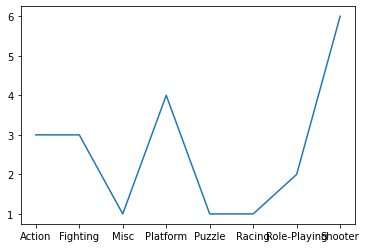

In [112]:
plt.plot(by_sales.set_index('Year')[by_sales.set_index('Year')['Global_Sales'] >= 7.0].groupby('Genre').size())

In [113]:
genre_df = pd.DataFrame(by_sales.set_index('Year')[by_sales.set_index('Year')['Global_Sales'] >= 7.0].groupby('Genre').size()).rename(columns={0:'Count'}).reset_index()
genre_df

,Genre,Count
0,Action,3
1,Fighting,3
2,Misc,1
3,Platform,4
4,Puzzle,1
5,Racing,1
6,Role-Playing,2
7,Shooter,6


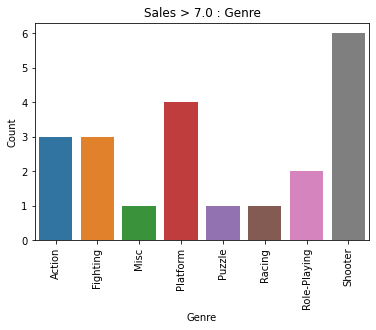

In [114]:
sns.barplot(x='Genre', y='Count', data=genre_df)
plt.xticks(rotation=90)
plt.title("Sales > 7.0 : Genre")
plt.show()

In [115]:
Platform_df = pd.DataFrame(by_sales.set_index('Year')[by_sales.set_index('Year')['Global_Sales'] >= 7.0].groupby('Platform').size()).rename(columns={0:'Count'}).reset_index()
Platform_df

,Platform,Count
0,2600,1
1,3DS,1
2,DS,1
3,GC,1
4,N64,1
5,NES,1
6,PS,4
7,PS2,1
8,PS3,1
9,PS4,2


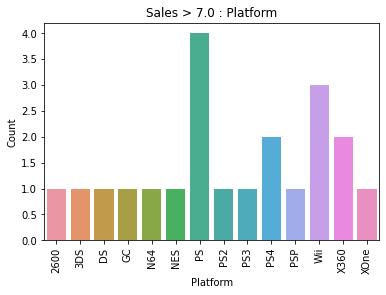

In [116]:
sns.barplot(x='Platform', y='Count', data=Platform_df)
plt.xticks(rotation=90)
plt.title("Sales > 7.0 : Platform")
plt.show()

In [117]:
Publisher_df = pd.DataFrame(by_sales.set_index('Year')[by_sales.set_index('Year')['Global_Sales'] >= 7.0].groupby('Publisher').size()).rename(columns={0:'Count'}).reset_index()
Publisher_df

,Publisher,Count
0,Activision,3
1,Atari,1
2,Electronic Arts,4
3,Nintendo,7
4,Sony Computer Entertainment,3
5,SquareSoft,1
6,Take-Two Interactive,1
7,Ubisoft,1


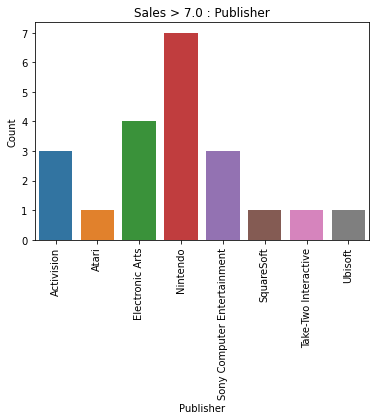

In [118]:
sns.barplot(x='Publisher', y='Count', data=Publisher_df)
plt.xticks(rotation=90)
plt.title("Sales > 7.0 : Publisher")
plt.show()

In [119]:
Year_df = pd.DataFrame(by_sales.set_index('Year')[by_sales.set_index('Year')['Global_Sales'] >= 7.0].groupby('Year').size()).rename(columns={0:'Count'}).reset_index()
Year_df

,Year,Count
0,1982,1
1,1988,1
2,1997,1
3,1998,3
4,1999,1
5,2001,1
6,2003,1
7,2005,1
8,2006,1
9,2008,2


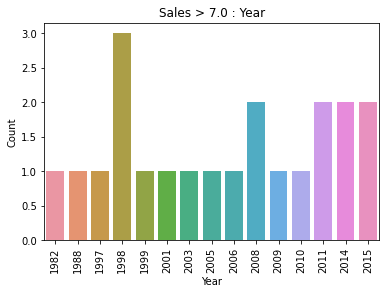

In [120]:
sns.barplot(x='Year', y='Count', data=Year_df)
plt.xticks(rotation=90)
plt.title("Sales > 7.0 : Year")
plt.show()

- 출고량이 높은 순위 top 100을 기준으로 봄.

In [124]:
by_sales_100 = by_sales[:100]
by_sales_100

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Final Fantasy VIII,PS,1999,Role-Playing,SquareSoft,2.28,1.72,3.63,0.23,7.86
1,Pokémon Platinum Version,DS,2008,Role-Playing,Nintendo,2.82,1.78,2.69,0.55,7.84
2,Pac-Man,2600,1982,Puzzle,Atari,7.28,0.45,0.00,0.08,7.81
3,Grand Theft Auto: Liberty City Stories,PSP,2005,Action,Take-Two Interactive,2.90,2.83,0.24,1.75,7.72
4,Super Mario Galaxy 2,Wii,2010,Platform,Nintendo,3.66,2.42,0.98,0.64,7.70
...,...,...,...,...,...,...,...,...,...,...
95,Super Mario Land 3: Wario Land,GB,1994,Platform,Nintendo,2.49,0.98,1.57,0.15,5.19
96,FIFA Soccer 13,X360,2012,Action,Electronic Arts,1.08,3.48,0.03,0.58,5.17
97,The Legend of Zelda: Phantom Hourglass,DS,2007,Action,Nintendo,1.90,1.83,0.95,0.49,5.17
98,Donkey Kong Country 2: Diddy's Kong Quest,SNES,1995,Platform,Nintendo,2.10,0.74,2.20,0.11,5.15


In [143]:
sales_100_Platform = pd.DataFrame(by_sales_100.groupby('Platform').size()).rename(columns={0:'Count'}).reset_index()
sales_100_Platform.head()

,Platform,Count
0,2600,1
1,3DS,2
2,DS,6
3,GB,4
4,GBA,5


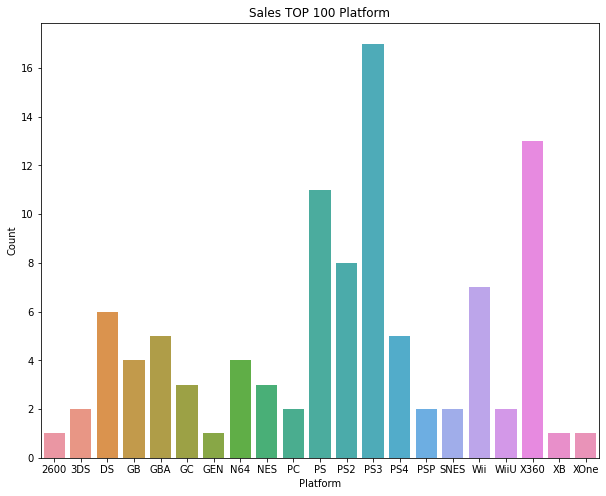

In [147]:
plt.figure(figsize=(10,8))
sns.barplot(x='Platform', y='Count', data=sales_100_Platform)
plt.title("Sales TOP 100 Platform")
plt.show()

In [148]:
sales_100_Genre = pd.DataFrame(by_sales_100.groupby('Genre').size()).rename(columns={0:'Count'}).reset_index()
sales_100_Genre.head()

,Genre,Count
0,Action,23
1,Adventure,1
2,Fighting,6
3,Misc,5
4,Platform,17


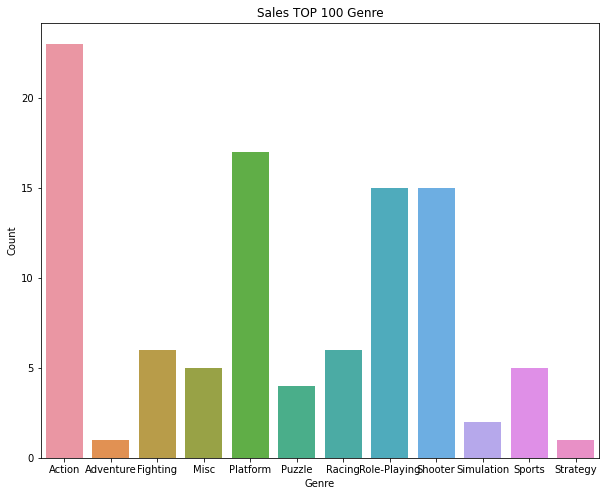

In [149]:
plt.figure(figsize=(10,8))
sns.barplot(x='Genre', y='Count', data=sales_100_Genre)
plt.title("Sales TOP 100 Genre")
plt.show()

In [153]:
sales_100_Publisher = pd.DataFrame(by_sales_100.groupby('Publisher').size()).rename(columns={0:'Count'}).reset_index()
sales_100_Publisher.head()

,Publisher,Count
0,505 Games,2
1,Activision,8
2,Atari,1
3,Bethesda Softworks,2
4,Capcom,2


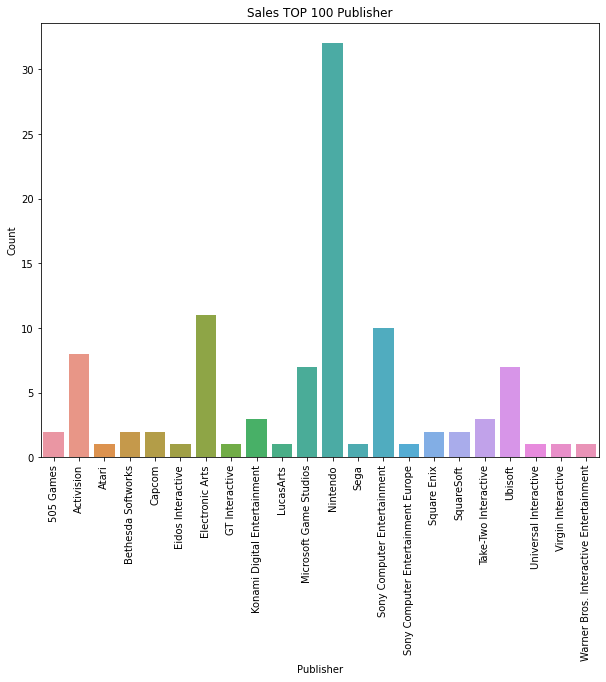

In [156]:
plt.figure(figsize=(10,8))
sns.barplot(x='Publisher', y='Count', data=sales_100_Publisher)
plt.title("Sales TOP 100 Publisher")
plt.xticks(rotation=90)
plt.show()

다음 분기에 어떤 게임을 설계해야 할까?

Genre: Action
- 일본 지역을 제외한 북미, 유럽, 기타 지역에서 Acition 장르를 선호.
- 2000년대 이후 Acition 장르의 인기가 높아지고 있음.
- 출고량이 높은 데이터를 보아도 Action이 가장 많은 것을 알 수 있음.

Platform: PS 시리즈
- 출고량이 높은 데이터를 보았을 때 Platform에서 PS 시리즈가 가장 많은 판매량을 기록.